<a href="https://colab.research.google.com/github/sriramofficial9/Feature_Engineering_project/blob/main/FE_Project_Group_14_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read data path and check files

In [ ]:
train_data_path = "/content/drive/MyDrive/car_dent_coco/train/"
test_data_path = "/content/drive/MyDrive/car_dent_coco/test/"
valid_data_path = "/content/drive/MyDrive/car_dent_coco/valid/"

In [ ]:
print(train_data_path)

/content/drive/MyDrive/car_dent_coco/train/


# Data cleaning


In [ ]:
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from skimage import io
from collections import Counter
import random
import numpy as np
import matplotlib.pyplot as plt

# Removing duplicate images

In [ ]:
def remove_duplicates(directory):
    seen_images = set()
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        # Check if the path points to a file
        if os.path.isfile(file_path):
            with open(file_path, 'rb') as f:
                image_hash = hash(f.read())
                if image_hash in seen_images:
                    os.remove(file_path)
                else:
                    seen_images.add(image_hash)

# Apply to train, test, and valid directories
remove_duplicates(train_data_path)
remove_duplicates(test_data_path)
remove_duplicates(valid_data_path)

# Handling Missing or corrupted images


In [ ]:
def remove_invalid_images(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            # Skip non-image files
            if not is_valid_image(file_path):
                continue

            img = io.imread(file_path)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
            os.remove(file_path)

# Function to check if a file is a valid image
def is_valid_image(file_path):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff']
    return any(file_path.lower().endswith(ext) for ext in valid_extensions)

# Apply to train, test, and valid directories
remove_invalid_images(train_data_path)
remove_invalid_images(test_data_path)
remove_invalid_images(valid_data_path)

#Cropping

In [ ]:
def crop_images(directory, crop_box):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)

        # Skip directories
        if os.path.isdir(file_path):
            continue

        im = Image.open(file_path)
        im_cropped = im.crop(crop_box)
        im_cropped.save(file_path)

# Specify the crop box as (left, upper, right, lower)
crop_box = (50, 50, 150, 150)

# Apply to train, test, and valid directories
crop_images(train_data_path, crop_box)
crop_images(test_data_path, crop_box)
crop_images(valid_data_path, crop_box)

# Normalize pixel values

In [ ]:
def normalize_images(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        # Skip directories
        if os.path.isdir(file_path):
            continue

        im = Image.open(file_path)
        im_array = np.array(im) / 255.0  # Normalize pixel values to the range [0, 1]
        im_normalized = Image.fromarray((im_array * 255).astype('uint8'))
        im_normalized.save(file_path)

# Apply to train, test, and valid directories
normalize_images(train_data_path)
normalize_images(test_data_path)
normalize_images(valid_data_path)

#  Correct Labeling Errors

In [ ]:
def load_labels(directory):
    labels = []
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        # Skip directories
        if os.path.isdir(file_path):
            continue
        # Extract the label from the filename or file path (adjust as needed)
        label = extract_label(filename)
        labels.append(label)
    return labels

In [ ]:
def check_and_correct_labels(directory, label_mapping):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        # Skip directories
        if os.path.isdir(file_path):
            continue

        # Extract the label from the filename or file path (adjust as needed)
        label = extract_label(filename)

        # Check if the label is valid
        if label not in label_mapping:
            # Correct the label or handle the error as needed
            correct_label = correct_label_error(label)

            # Update the file path with the corrected label (if needed)
            new_filename = filename.replace(label, correct_label)
            new_file_path = os.path.join(directory, new_filename)

            # Rename the file with the corrected label
            os.rename(file_path, new_file_path)
            print(f"Corrected label for {filename}: {label} -> {correct_label}")

In [ ]:
def extract_label(filename):
    return filename.split('_')[0]

In [ ]:
def correct_label_error(label):
    # Implement logic to correct label errors
    # For simplicity, let's assume the correct label is the uppercase version
    return label.upper()

In [ ]:
label_mapping = {'label1': 'Label1', 'label2': 'Label2', 'label3': 'Label3'}  # Replace with your actual label mapping
check_and_correct_labels(train_data_path, label_mapping)
check_and_correct_labels(test_data_path, label_mapping)
check_and_correct_labels(valid_data_path, label_mapping)

Corrected label for FRONT_bumber--73-_jpg.rf.352d6b70a0ba22d60b37571047d9f8c5.jpg: FRONT -> FRONT
Corrected label for REAR_winscreen--87-_jpg.rf.5c4e763661eb6a2eecd700e07e4c46ca.jpg: REAR -> REAR
Corrected label for SIDE_mirror--41-_jpg.rf.a626876f1a66c8f3173c00f3e3cfb86f.jpg: SIDE -> SIDE
Corrected label for SIDE_mirror--81-_jpg.rf.f086d4f0ea8cfd43eab9a97e003f1538.jpg: SIDE -> SIDE
Corrected label for SIDE_mirror--42-_jpg.rf.271dc3b507c0d7aa14106b49a45c718b.jpg: SIDE -> SIDE
Corrected label for IA_300000111_jpg.rf.60e5cd0d664b41d22f79fc5c54d44adc.jpg: IA -> IA
Corrected label for FRONT_bumber--25-_jpg.rf.9268f0f343e22f93aef6cb93d547e699.jpg: FRONT -> FRONT
Corrected label for SIGN_light--3-_jpg.rf.996987d3a1923c1ae7c9416b8e711108.jpg: SIGN -> SIGN
Corrected label for REAR_winscreen--81-_jpg.rf.df831703ee5e97b2ece78b861ca613e4.jpg: REAR -> REAR
Corrected label for FRONT_bumper-sep23---42-_jpg.rf.241ee9150fbdf0847902bafc3da5992e.jpg: FRONT -> FRONT
Corrected label for REAR_bumber--79-_j

# Balance Class Distribution

In [ ]:
from collections import Counter
import random
import os
import shutil

def balance_class_distribution(directory, target_size, outlier_threshold=100):
    labels = load_labels(directory)

    if not labels:
        print(f"No labels found in the directory: {directory}")
        # Print the contents of the directory for further inspection
        print(f"Directory contents: {os.listdir(directory)}")
        return

    class_counts = Counter(labels)

    if not class_counts:
        print(f"No classes found in the directory: {directory}")
        return

    # Print the extracted labels for inspection
    print(f"Extracted labels: {labels}")

    # Find the class with the minimum number of samples
    min_class_count = min(class_counts.values())

    if min_class_count == 0:
        print(f"No samples found for any class in the directory: {directory}")
        return

    # Create directories for balanced data
    balanced_directory = os.path.join(directory, 'balanced')
    os.makedirs(balanced_directory, exist_ok=True)

    # Copy a balanced number of samples from each class, excluding outliers
    for label, count in class_counts.items():
        source_files = [file for file in os.listdir(directory) if file.startswith(label)]

        if not source_files:
            print(f"No files found for class {label} in the directory: {directory}")
            continue

        # Exclude outliers based on a threshold (e.g., exclude samples with count > outlier_threshold)
        if count > outlier_threshold:
            continue

        balanced_files = random.sample(source_files, min(min_class_count, target_size))
        for file in balanced_files:
            source_path = os.path.join(directory, file)
            dest_path = os.path.join(balanced_directory, file)
            shutil.copy(source_path, dest_path)

# Apply to train, test, and valid directories
target_size_per_class = 100
balance_class_distribution(train_data_path, target_size_per_class)
balance_class_distribution(test_data_path, target_size_per_class)
balance_class_distribution(valid_data_path, target_size_per_class)

Extracted labels: ['FRONT', 'REAR', 'SIDE', 'SIDE', 'SIDE', 'IA', 'FRONT', 'SIGN', 'REAR', 'FRONT', 'REAR', 'FRONT', 'BACK', 'IA', 'REAR', 'IMAGES', 'MINOR', 'CAR', 'BACK', 'HEADLIGHT', 'MAJOR', 'SIDE', 'REAR', 'CAR', 'MINOR', 'SIGN', 'CAR', 'REAR', 'REAR', 'REAR', 'BACK', 'DOWNLOAD', 'CAR', 'MINOR', 'FRONT', 'MEDIUM', 'MODERATE', 'MAJOR', 'IMAGES--3-', 'CAR', 'IA', 'SIGN', 'FRONT', 'CAR', 'IMAGES--3-', 'MEDIUM', 'MINOR', 'FRONT', 'REAR', 'REAR', 'IA', 'REAR', 'HEADLIGHT', 'MAJOR', 'CAR', 'IMAGES--2-', 'SIDE', 'CAR', 'MINOR', 'MAJOR', 'IA', 'SCRATCH', 'MINOR', 'CAR', 'MAJOR', 'HEADLIGHT', 'IMAGES--4-', 'IMAGES--6-', 'FRONT', 'HEADLIGHT', 'IA', 'MINOR', 'FRONT', 'MAJOR', 'IMAGES', 'MAJOR', 'SIDE', 'BODY', 'MAJOR', 'OUTER', 'REAR', 'FRONT', 'BODY', 'CAR', 'IMAGES', 'IMG', 'IA', 'BACK', 'MODERATE', 'REAR', 'SIGN', 'BACK', 'BACK', 'OUTER', 'SCRATCH', 'MINOR', 'REAR', 'SIDE', 'REAR', 'SIDE', 'REAR', 'IA', 'FRONT', 'BODY', 'BODY', 'SIDE', 'BACK', 'IA', 'IMAGES--6-', 'IMAGES--2-', 'CAR', 'SCR

# Loading Images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_images(directory, target_size, batch_size, class_mode='categorical'):
    # Create an ImageDataGenerator
    datagen = ImageDataGenerator(rescale=1./255)

    # Flow from directory with specified target size and batch size
    image_generator = datagen.flow_from_directory(
        directory,
        target_size=target_size,
        batch_size=batch_size,
        class_mode=class_mode
    )

    return image_generator

# Example usage
balanced_data_path = "/content/drive/MyDrive/car_dent_coco"  # Replace with the actual path
target_size = (224, 224)  # Set the target size for the images
batch_size = 32  # Set the batch size for loading images

# Load training images
train_generator = load_images(
    directory=os.path.join(balanced_data_path, 'train'),
    target_size=target_size,
    batch_size=batch_size
)

# Load validation images
valid_generator = load_images(
    directory=os.path.join(balanced_data_path, 'valid'),
    target_size=target_size,
    batch_size=batch_size
)

# Load test images (if applicable)
test_generator = load_images(
    directory=os.path.join(balanced_data_path, 'test'),
    target_size=target_size,
    batch_size=batch_size
)

Found 15930 images belonging to 2 classes.
Found 248 images belonging to 1 classes.
Found 46 images belonging to 1 classes.


# Data Augmention

In [ ]:
# Create a new ImageDataGenerator for data augmentation
augmentation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Flow from directory with specified target size and batch size
augmented_train_generator = augmentation_datagen.flow_from_directory(
    os.path.join(balanced_data_path, 'train'),
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

augmented_test_generator = augmentation_datagen.flow_from_directory(
    os.path.join(balanced_data_path, 'test'),
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

augmented_test_generator = augmentation_datagen.flow_from_directory(
    os.path.join(balanced_data_path, 'valid'),
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 15930 images belonging to 2 classes.
Found 46 images belonging to 1 classes.
Found 248 images belonging to 1 classes.


# Train model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [ ]:
# dimensions of our images.
img_width, img_height = 640, 640

nb_train_samples = 2000
nb_validation_samples = 800
nb_epoch = 5


model = Sequential()
model.add(Convolution2D(32, (3, 3),padding='same',input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32,(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 640, 640, 32)      896       
                                                                 
 activation (Activation)     (None, 640, 640, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 320, 320, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 318, 318, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 318, 318, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 159, 159, 32)      0         
 g2D)                                                   

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop

# Set the dimensions of your augmented images
img_width, img_height = 224, 224  # Adjusted to the target size in your data augmentation

# Set other parameters
nb_train_samples = ...  # Replace with the actual number of training samples
nb_validation_samples = ...  # Replace with the actual number of validation samples
nb_epochs = 5  # Set the number of epochs
batch_size = 32  # Set the batch size for training

# Create a Sequential model
model = Sequential()

# Add Convolutional layers
model.add(Convolution2D(32, (3, 3), padding='same', input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output and add Dense layers
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
from keras.layers import Dense,Activation,Dropout, Conv2D, MaxPool2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1, min_delta=0.001)
modelcheck = ModelCheckpoint('best_model.hdf5', monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')

In [ ]:
# Number of training and validation samples
nb_train_samples = 2000
nb_validation_samples = 800
batch_size = 32

# Calculate steps per epoch based on the total number of samples and batch size
steps_per_epoch = nb_train_samples // batch_size

# Train the model
history = model.fit(
    augmented_train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=nb_epochs,
    validation_data=augmented_test_generator,
    validation_steps=nb_validation_samples // batch_size,
)



Epoch 1/5
62/62 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5000

62/62 [==============================] - 166s 3s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 1.0000
Epoch 2/5
62/62 [==============================] - 154s 2s/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3/5
62/62 [==============================] - 157s 3s/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4/5
62/62 [==============================] - 154s 2s/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5/5
62/62 [==============================] - 159s 3s/step - loss: 0.6931 - accuracy: 0.5000


In [ ]:
model.save('car_model.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Saving the model for Future Inferences

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [ ]:
# imports
import tensorflow as tf
# opening and store file in a variable

json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()

# use Keras model_from_json to make a loaded model

loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# load weights into new model

loaded_model.load_weights("model.h5")
print("Loaded Model from disk")

# compile and evaluate loaded model

loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


Loaded Model from disk


In [ ]:
# from flask import Flask, render_template, request

# @app.route('/')
# def index_view():
#     return render_template('index.html')


# @app.route('/predict/',methods=['GET','POST'])
# def predict():
#     response = "For ML Prediction"
#     return response

# if __name__ == '__main__':
#     app.run(debug=True, port=8000)

In [ ]:
def get_model():
    global model
    model = load_model('car_model')
    print("Model loaded!")

In [ ]:
def load_image(img_path):

    img = image.load_img(img_path)
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    return img_tensor

def prediction(img_path):
    new_image = load_image(img_path)

    pred = model.predict(new_image)

    print(pred)

    labels=np.array(pred)
    labels[labels>=0.6]=1
    labels[labels<0.6]=0

    print(labels)
    final=np.array(labels)

    if final[0][0]==1:
        return "Bad"
    else:
        return "Good"

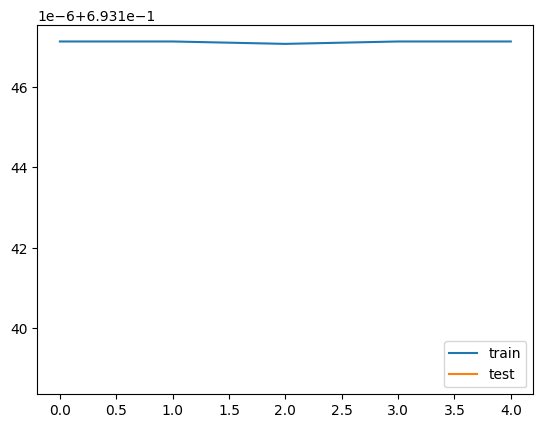

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
if 'val_accuracy' in history.history and len(history.history['val_accuracy']) >= 2:
    print('Test accuracy achieved', history.history['val_accuracy'][-2])
else:
    print('Validation accuracy data not available or not enough epochs.')

Validation accuracy data not available or not enough epochs.


# Evaluate the model

In [ ]:
model.evaluate_generator(generator=valid_dataset,
steps=32)

<ipython-input-51-fa6d5d95cf51>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(generator=valid_dataset,


[0.693147599697113, 0.0]

# Predict the output

In [ ]:
test_dataset.reset()
pred=model.predict_generator(test_dataset,
steps=128,
verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)


NameError: ignored

In [ ]:
predicted_class_indices

# 0 = car damage

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
labels = (train_dataset.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
filenames=test_dataset.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

# Validate Model Output

In [ ]:
#Check data in validation dataset
import glob
# print(glob.glob(str(valid_data_path)+'/*.jpg'))

1/1 [==============================] - 0s 312ms/step
[[0.]]


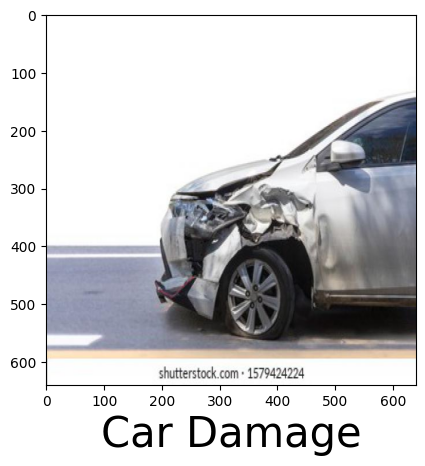

In [ ]:
# Our predict function
def predictImage(filename):

    img = image.load_img(filename)
    plt.imshow(img)

    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val < 0.5:
        plt.xlabel("Car Damage",fontsize=30)
    elif val >= 0.5:
        plt.xlabel("Car Not Damage",fontsize=30)


u = '/content/drive/MyDrive/car_dent_coco/valid/rear_bumper-sep23---60-_jpg.rf.f20c9aeb3fa88e632b275bfccd7fdf4c.jpg'
predictImage(u)

# Deploy the model

In [ ]:
!pip install fastapi uvicorn
!pip install --upgrade fastapi
!pip install --upgrade typing-extensions

In [ ]:
from pydantic import BaseModel
from fastapi import FastAPI
import uvicorn

app = FastAPI()


class request_body(BaseModel):
    f_name: str

# Creating an Endpoint to receive the data
# to make prediction on.
@app.post('/predict')
def predict(data : request_body):
    # Making the data in a form suitable for prediction

    img = image.load_img(filename)
    plt.imshow(img)

    Y = image.img_to_array(img)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val < 0.5:
        plt.xlabel("Car Damage",fontsize=30)
    elif val >= 0.5:
        plt.xlabel("Car Not Damage",fontsize=30)
    return { 'class' : iris.target_names[class_idx]}



    # Return the Result
#     return { 'class' : iris.target_names[class_idx]}

# StreamLit Web app

In [ ]:
!pip install --upgrade streamlit
!pip install -q streamlit_ace

In [ ]:
import numpy as np
import streamlit as st
import tensorflow as tf
from PIL import Image, ImageOps
def import_and_predict(image_data, model):

        size = (150,150)
        image = ImageOps.fit(image_data)
#         image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        image = (image.astype(np.float32) / 255.0)

        img_reshape = image[np.newaxis,...]
#         img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.

#         img_reshape = img_resize[np.newaxis,...]

        prediction = model.predict(img_reshape)

        return prediction

model = tf.keras.models.load_model('car_model.hdf5')

import streamlit as st
st.write("""
         # Car Damage Detection
         """
         )
st.write("This is a simple image classification web app to predict damage")
file = st.file_uploader("Please upload an image file", type=["jpg", "png"])
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    prediction = import_and_predict(image, model)

    if np.argmax(prediction) < 0.5:
        st.write("Car Damage!")
    elif np.argmax(prediction) >= 0.5:
        st.write("Car Not Damage!")


    st.text("Probability (0: Car_Damage, 1: Car_Not_Damage")
    st.write(prediction)

2023-11-14 05:23:37.234 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


# References

*    [Tutorial-image-classification-with-keras-flow-from-directory-and-generators](https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720)

In [ ]:
# Create a new cell and write your Streamlit app code
streamlit_code = """
import streamlit as st
import numpy as np
import tensorflow as tf
from PIL import Image, ImageOps

# Load the model
model = tf.keras.models.load_model('car_model.hdf5')

# Function to make predictions
def import_and_predict(image_data, model):
    size = (150, 150)
    image = ImageOps.fit(image_data, size)
    image = np.asarray(image)
    image = (image.astype(np.float32) / 255.0)
    img_reshape = image[np.newaxis, ...]
    prediction = model.predict(img_reshape)
    return prediction

# Streamlit app content
st.write("# Car Damage Detection")
st.write("This is a simple image classification web app to predict damage")

# File upload
file = st.file_uploader("Please upload an image file", type=["jpg", "png"])

if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    prediction = import_and_predict(image, model)

    if np.argmax(prediction) < 0.5:
        st.write("Car Damage!")
    elif np.argmax(prediction) >= 0.5:
        st.write("Car Not Damage!")

    st.text("Probability (0: Car_Damage, 1: Car_Not_Damage)")
    st.write(prediction)
"""

# Create a new cell and write the code to save it to a Python script file
save_to_file_code = """
with open('streamlit_app.py', 'w') as f:
    f.write(streamlit_code)
"""

# Execute the cells
exec(streamlit_code)
exec(save_to_file_code)


In [ ]:
# Run the Streamlit app in Colab
%run streamlit_app.py

2023-11-14 06:04:01.140 
  command:

    streamlit run streamlit_app.py [ARGUMENTS]


In [ ]:
!streamlit run streamlit_app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.141.133.100:8501

